# Cho dữ liệu bitcoin_price.csv. Áp dụng mô hình HoltWinters để dự báo Close price of bitcoin cho 3 tháng tiếp theo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
df = pd.read_csv('File/bitcoin_price.csv', 
                 parse_dates=['Date'], 
                 index_col='Date')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1655 entries, 2017-11-07 to 2013-04-28
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1655 non-null   float64
 1   High        1655 non-null   float64
 2   Low         1655 non-null   float64
 3   Close       1655 non-null   float64
 4   Volume      1655 non-null   object 
 5   Market Cap  1655 non-null   object 
dtypes: float64(4), object(2)
memory usage: 90.5+ KB


In [5]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-11-07,7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
2017-11-06,7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2017-11-05,7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
2017-11-04,7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
2017-11-03,7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [6]:
df = df[['Close']]
df.head()

,Close
Date,
2017-11-07,7144.38
2017-11-06,7022.76
2017-11-05,7407.41
2017-11-04,7379.95
2017-11-03,7207.76


In [7]:
df.tail()

,Close
Date,
2013-05-02,105.21
2013-05-01,116.99
2013-04-30,139.00
2013-04-29,144.54
2013-04-28,134.21


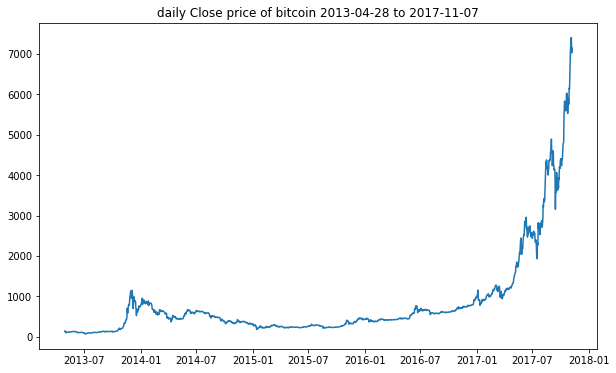

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df)
plt.title("daily Close price of bitcoin 2013-04-28 to 2017-11-07")
plt.show()

# Decomposition

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result

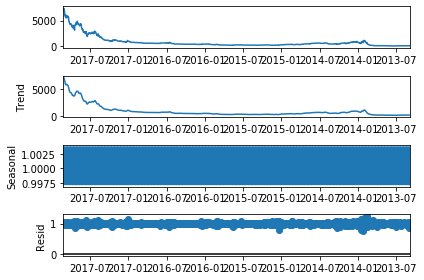

In [10]:
result.plot()
plt.show()

In [11]:
result1 = seasonal_decompose(df, model='additive')
result1

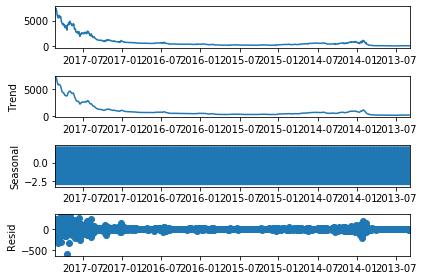

In [12]:
result1.plot()
plt.show()

# Split Train/Test > Apply Model

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1655 entries, 2017-11-07 to 2013-04-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1655 non-null   float64
dtypes: float64(1)
memory usage: 25.9 KB


In [14]:
df = df.sort_index()

In [15]:
train, test=df.iloc[0:1500,0], df.iloc[1500:, 0]

In [16]:
train[0:5]

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: Close, dtype: float64

In [17]:
test[0:5]

Date
2017-06-06    2863.20
2017-06-07    2732.16
2017-06-08    2805.62
2017-06-09    2823.81
2017-06-10    2947.71
Name: Close, dtype: float64

In [18]:
model = ExponentialSmoothing(train, seasonal='add', trend='add', seasonal_periods=7).fit(smoothing_level = 0.2,smoothing_slope = 0.03) # day, 7 day perweek

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [19]:
test.index[0]

Timestamp('2017-06-06 00:00:00')

In [20]:
test.index[-1]

Timestamp('2017-11-07 00:00:00')

In [21]:
pred = model.predict(start=test.index[0], end=test.index[-1])

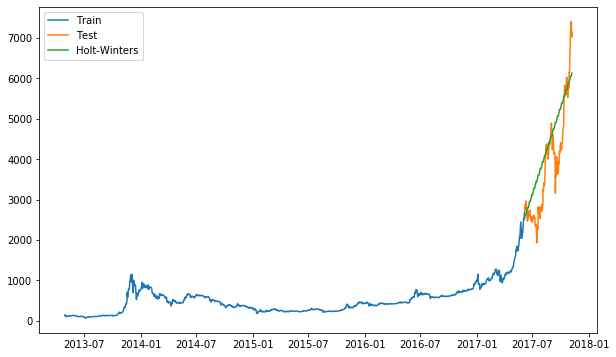

In [22]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse = mean_squared_error(test, pred)
mse

579092.132927008

In [24]:
r2 = r2_score(test,pred)
r2

0.6673124727589685

In [25]:
df.tail()

,Close
Date,
2017-11-03,7207.76
2017-11-04,7379.95
2017-11-05,7407.41
2017-11-06,7022.76
2017-11-07,7144.38


In [26]:
import datetime
s = datetime.datetime(2017, 11, 7)
e = datetime.datetime(2018, 2, 7)

In [27]:
s

datetime.datetime(2017, 11, 7, 0, 0)

In [28]:
e

datetime.datetime(2018, 2, 7, 0, 0)

In [29]:
pred_next_3_month = model.predict(start= s, end=e)

In [30]:
pred_next_3_month[90:]

2018-02-05    8224.173201
2018-02-06    8245.264326
2018-02-07    8308.877391
Freq: D, dtype: float64

In [31]:
x = pd.Series(pred_next_3_month)
type(x)

pandas.core.series.Series

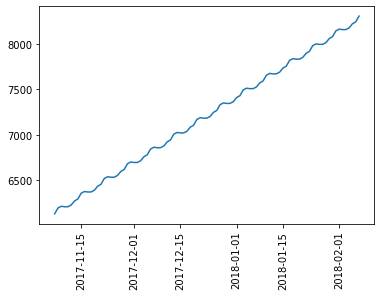

In [32]:
plt.plot(x.index, x.values)
plt.xticks(rotation = 'vertical')
plt.show()

# Visualization

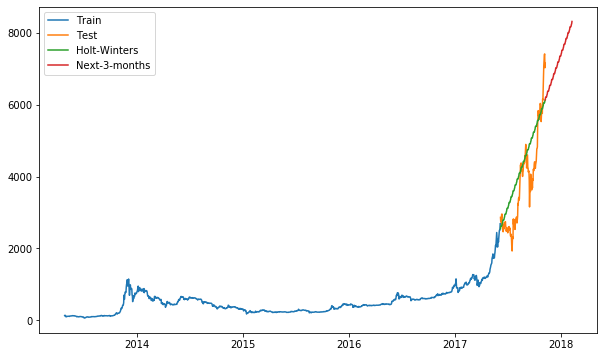

In [33]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.plot(x.index, x.values, label='Next-3-months')
plt.legend(loc='best')